# Petits exemples

In [1]:
import torch

In [2]:
x0 = 5.
x  = torch.tensor(x0, requires_grad=True)

In [3]:
x

tensor(5., requires_grad=True)

In [4]:
y = x**2

In [9]:
y

tensor(25., grad_fn=<PowBackward0>)

In [10]:
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [11]:
dy_dx = x.grad
dy_dx

tensor(10.)

In [12]:
x

tensor(5., requires_grad=True)

In [13]:
x = torch.tensor(5., requires_grad=True)
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)
k = torch.tensor(2., requires_grad=True)
y = a * x + b
z = x**k
y

tensor(13., grad_fn=<AddBackward0>)

In [10]:
y.backward()

In [11]:
x.grad

tensor(2.)

In [12]:
a.grad

tensor(5.)

In [13]:
b.grad

tensor(1.)

In [14]:
k.grad

In [15]:
z.backward()

In [16]:
x.grad

tensor(12.)

# Optimisation basique

In [17]:
lr = 0.1

x = torch.tensor(5., requires_grad=True)

for i in range(100):
    y = x**2

    y.backward()

    with torch.no_grad():
       x = x - lr * x.grad
        # if i % 10 == 0:
        #     lr = lr / 2 

    x.requires_grad_()

    print(x, y)

tensor(4., requires_grad=True) tensor(25., grad_fn=<PowBackward0>)
tensor(3.2000, requires_grad=True) tensor(16., grad_fn=<PowBackward0>)
tensor(2.5600, requires_grad=True) tensor(10.2400, grad_fn=<PowBackward0>)
tensor(2.0480, requires_grad=True) tensor(6.5536, grad_fn=<PowBackward0>)
tensor(1.6384, requires_grad=True) tensor(4.1943, grad_fn=<PowBackward0>)
tensor(1.3107, requires_grad=True) tensor(2.6844, grad_fn=<PowBackward0>)
tensor(1.0486, requires_grad=True) tensor(1.7180, grad_fn=<PowBackward0>)
tensor(0.8389, requires_grad=True) tensor(1.0995, grad_fn=<PowBackward0>)
tensor(0.6711, requires_grad=True) tensor(0.7037, grad_fn=<PowBackward0>)
tensor(0.5369, requires_grad=True) tensor(0.4504, grad_fn=<PowBackward0>)
tensor(0.4295, requires_grad=True) tensor(0.2882, grad_fn=<PowBackward0>)
tensor(0.3436, requires_grad=True) tensor(0.1845, grad_fn=<PowBackward0>)
tensor(0.2749, requires_grad=True) tensor(0.1181, grad_fn=<PowBackward0>)
tensor(0.2199, requires_grad=True) tensor(0.075

# Régression linaire

## Données toutes simples

In [18]:
x = torch.arange(0, 10, 0.1, requires_grad=False)
y = 2 * x + 5 + torch.randn(100)

In [20]:
y

tensor([ 5.8711,  7.4845,  3.4377,  4.0748,  7.2183,  6.3524,  7.4474,  5.3257,
         8.1654,  6.8914,  9.5190,  8.0787,  7.8335,  7.5046,  7.8759,  7.5803,
         9.2337,  7.3038,  7.2077, 10.0524,  9.8313,  9.5597, 10.3927,  9.2944,
        11.3000, 11.0928,  9.3304,  9.9958, 11.9761, 10.2613, 12.4875, 10.9083,
        10.9533, 11.4483, 11.8297, 11.0633, 11.9424, 13.9386, 12.0400, 13.0783,
        12.0906, 13.2129, 12.8604, 13.0587, 13.0606, 17.0970, 15.0600, 13.9710,
        16.4890, 15.6616, 15.8810, 16.1493, 15.4576, 14.1924, 15.4540, 16.7088,
        15.4754, 16.0096, 16.9702, 16.6600, 16.8342, 16.4585, 17.4687, 16.9044,
        17.6302, 18.2732, 18.7267, 17.2690, 17.8997, 19.1489, 18.7702, 19.8202,
        19.7631, 19.8820, 20.0382, 21.8739, 22.4612, 20.5327, 22.4531, 21.1372,
        19.7228, 21.8753, 21.8529, 23.0037, 20.6299, 23.4226, 24.7839, 21.1438,
        22.2734, 23.2008, 22.1193, 23.9554, 24.3242, 22.1641, 25.3197, 24.4085,
        24.0816, 23.3503, 24.0611, 26.59

In [21]:
import matplotlib.pyplot as plt

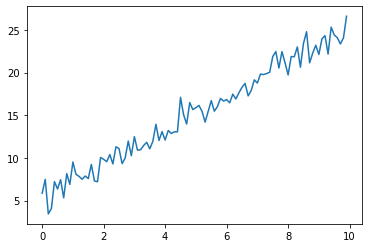

In [22]:
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()

## À la main

Les 3 variantes ci-dessous font la même chose.

Le point important est que lors de la mise à jour, on doit éviter de créer une boucle dans le graphe de calcul.

0 tensor(113.1880, grad_fn=<DivBackward0>) tensor(2.1746) tensor(0.2039)
1 tensor(18.7804, grad_fn=<DivBackward0>) tensor(2.5576) tensor(0.2874)
2 tensor(8.5518, grad_fn=<DivBackward0>) tensor(2.6809) tensor(0.3313)
3 tensor(7.3944, grad_fn=<DivBackward0>) tensor(2.7188) tensor(0.3621)
4 tensor(7.2151, grad_fn=<DivBackward0>) tensor(2.7288) tensor(0.3886)
5 tensor(7.1417, grad_fn=<DivBackward0>) tensor(2.7296) tensor(0.4135)
6 tensor(7.0802, grad_fn=<DivBackward0>) tensor(2.7274) tensor(0.4379)
7 tensor(7.0206, grad_fn=<DivBackward0>) tensor(2.7243) tensor(0.4620)
8 tensor(6.9617, grad_fn=<DivBackward0>) tensor(2.7208) tensor(0.4859)
9 tensor(6.9034, grad_fn=<DivBackward0>) tensor(2.7172) tensor(0.5097)
10 tensor(6.8457, grad_fn=<DivBackward0>) tensor(2.7136) tensor(0.5334)
11 tensor(6.7885, grad_fn=<DivBackward0>) tensor(2.7101) tensor(0.5569)
12 tensor(6.7319, grad_fn=<DivBackward0>) tensor(2.7065) tensor(0.5804)
13 tensor(6.6759, grad_fn=<DivBackward0>) tensor(2.7030) tensor(0.6037)

209 tensor(1.8688, grad_fn=<DivBackward0>) tensor(2.2606) tensor(3.5157)
210 tensor(1.8609, grad_fn=<DivBackward0>) tensor(2.2593) tensor(3.5244)
211 tensor(1.8531, grad_fn=<DivBackward0>) tensor(2.2580) tensor(3.5331)
212 tensor(1.8453, grad_fn=<DivBackward0>) tensor(2.2567) tensor(3.5418)
213 tensor(1.8377, grad_fn=<DivBackward0>) tensor(2.2554) tensor(3.5504)
214 tensor(1.8301, grad_fn=<DivBackward0>) tensor(2.2541) tensor(3.5590)
215 tensor(1.8226, grad_fn=<DivBackward0>) tensor(2.2528) tensor(3.5675)
216 tensor(1.8151, grad_fn=<DivBackward0>) tensor(2.2515) tensor(3.5760)
217 tensor(1.8078, grad_fn=<DivBackward0>) tensor(2.2502) tensor(3.5845)
218 tensor(1.8005, grad_fn=<DivBackward0>) tensor(2.2489) tensor(3.5929)
219 tensor(1.7933, grad_fn=<DivBackward0>) tensor(2.2476) tensor(3.6013)
220 tensor(1.7861, grad_fn=<DivBackward0>) tensor(2.2464) tensor(3.6096)
221 tensor(1.7790, grad_fn=<DivBackward0>) tensor(2.2451) tensor(3.6179)
222 tensor(1.7720, grad_fn=<DivBackward0>) tensor(2

420 tensor(1.1690, grad_fn=<DivBackward0>) tensor(2.0865) tensor(4.6620)
421 tensor(1.1681, grad_fn=<DivBackward0>) tensor(2.0860) tensor(4.6650)
422 tensor(1.1671, grad_fn=<DivBackward0>) tensor(2.0856) tensor(4.6681)
423 tensor(1.1662, grad_fn=<DivBackward0>) tensor(2.0851) tensor(4.6711)
424 tensor(1.1652, grad_fn=<DivBackward0>) tensor(2.0847) tensor(4.6741)
425 tensor(1.1643, grad_fn=<DivBackward0>) tensor(2.0842) tensor(4.6771)
426 tensor(1.1634, grad_fn=<DivBackward0>) tensor(2.0838) tensor(4.6801)
427 tensor(1.1625, grad_fn=<DivBackward0>) tensor(2.0833) tensor(4.6831)
428 tensor(1.1615, grad_fn=<DivBackward0>) tensor(2.0829) tensor(4.6861)
429 tensor(1.1607, grad_fn=<DivBackward0>) tensor(2.0824) tensor(4.6890)
430 tensor(1.1598, grad_fn=<DivBackward0>) tensor(2.0820) tensor(4.6919)
431 tensor(1.1589, grad_fn=<DivBackward0>) tensor(2.0815) tensor(4.6948)
432 tensor(1.1580, grad_fn=<DivBackward0>) tensor(2.0811) tensor(4.6978)
433 tensor(1.1572, grad_fn=<DivBackward0>) tensor(2

631 tensor(1.0833, grad_fn=<DivBackward0>) tensor(2.0255) tensor(5.0633)
632 tensor(1.0831, grad_fn=<DivBackward0>) tensor(2.0254) tensor(5.0644)
633 tensor(1.0830, grad_fn=<DivBackward0>) tensor(2.0252) tensor(5.0654)
634 tensor(1.0829, grad_fn=<DivBackward0>) tensor(2.0251) tensor(5.0665)
635 tensor(1.0828, grad_fn=<DivBackward0>) tensor(2.0249) tensor(5.0675)
636 tensor(1.0827, grad_fn=<DivBackward0>) tensor(2.0247) tensor(5.0686)
637 tensor(1.0826, grad_fn=<DivBackward0>) tensor(2.0246) tensor(5.0696)
638 tensor(1.0825, grad_fn=<DivBackward0>) tensor(2.0244) tensor(5.0707)
639 tensor(1.0823, grad_fn=<DivBackward0>) tensor(2.0243) tensor(5.0717)
640 tensor(1.0822, grad_fn=<DivBackward0>) tensor(2.0241) tensor(5.0728)
641 tensor(1.0821, grad_fn=<DivBackward0>) tensor(2.0240) tensor(5.0738)
642 tensor(1.0820, grad_fn=<DivBackward0>) tensor(2.0238) tensor(5.0748)
643 tensor(1.0819, grad_fn=<DivBackward0>) tensor(2.0236) tensor(5.0758)
644 tensor(1.0818, grad_fn=<DivBackward0>) tensor(2

837 tensor(1.0728, grad_fn=<DivBackward0>) tensor(2.0045) tensor(5.2019)
838 tensor(1.0728, grad_fn=<DivBackward0>) tensor(2.0044) tensor(5.2023)
839 tensor(1.0728, grad_fn=<DivBackward0>) tensor(2.0044) tensor(5.2027)
840 tensor(1.0728, grad_fn=<DivBackward0>) tensor(2.0043) tensor(5.2030)
841 tensor(1.0728, grad_fn=<DivBackward0>) tensor(2.0043) tensor(5.2034)
842 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0042) tensor(5.2038)
843 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0042) tensor(5.2042)
844 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0041) tensor(5.2045)
845 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0040) tensor(5.2049)
846 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0040) tensor(5.2053)
847 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0039) tensor(5.2056)
848 tensor(1.0727, grad_fn=<DivBackward0>) tensor(2.0039) tensor(5.2060)
849 tensor(1.0726, grad_fn=<DivBackward0>) tensor(2.0038) tensor(5.2064)
850 tensor(1.0726, grad_fn=<DivBackward0>) tensor(2

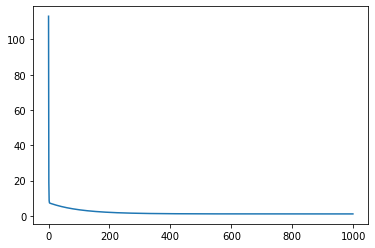

In [23]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
lr = 0.01

history = []
for epoch in range(1000):
    loss = torch.sum((a * x + b - y)**2) / x.shape[0]
    history.append(loss)
    loss.backward()

    with torch.no_grad(): # On ne stocke pas les gradients
        a = a - lr * a.grad
        b = b - lr * b.grad

    a.requires_grad_() # Mais on voudra quand même les gradients plus tard dans la suite
    b.requires_grad_()

    print(epoch, loss, a.data, b.data)

plt.plot(history)
plt.show()

In [24]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
lr = 0.01

for epoch in range(1000):
    loss = torch.sum((a * x + b - y)**2) / x.shape[0]
    loss.backward()

    # Pas de graphe de calcul, on manipule directement les valeurs
    a.data = a.data - lr * a.grad.data
    b.data = b.data - lr * b.grad.data

    # On réinitalise les gradients pour préparer la prochaine étape
    a.grad.data.zero_()
    b.grad.data.zero_()

    print(epoch, loss, a.data, b.data)

0 tensor(113.1880, grad_fn=<DivBackward0>) tensor(2.1746) tensor(0.2039)
1 tensor(18.7804, grad_fn=<DivBackward0>) tensor(2.5576) tensor(0.2874)
2 tensor(8.5518, grad_fn=<DivBackward0>) tensor(2.6809) tensor(0.3313)
3 tensor(7.3944, grad_fn=<DivBackward0>) tensor(2.7188) tensor(0.3621)
4 tensor(7.2151, grad_fn=<DivBackward0>) tensor(2.7288) tensor(0.3886)
5 tensor(7.1417, grad_fn=<DivBackward0>) tensor(2.7296) tensor(0.4135)
6 tensor(7.0802, grad_fn=<DivBackward0>) tensor(2.7274) tensor(0.4379)
7 tensor(7.0206, grad_fn=<DivBackward0>) tensor(2.7243) tensor(0.4620)
8 tensor(6.9617, grad_fn=<DivBackward0>) tensor(2.7208) tensor(0.4859)
9 tensor(6.9034, grad_fn=<DivBackward0>) tensor(2.7172) tensor(0.5097)
10 tensor(6.8457, grad_fn=<DivBackward0>) tensor(2.7136) tensor(0.5334)
11 tensor(6.7885, grad_fn=<DivBackward0>) tensor(2.7101) tensor(0.5569)
12 tensor(6.7319, grad_fn=<DivBackward0>) tensor(2.7065) tensor(0.5804)
13 tensor(6.6759, grad_fn=<DivBackward0>) tensor(2.7030) tensor(0.6037)

208 tensor(1.8768, grad_fn=<DivBackward0>) tensor(2.2620) tensor(3.5069)
209 tensor(1.8688, grad_fn=<DivBackward0>) tensor(2.2606) tensor(3.5157)
210 tensor(1.8609, grad_fn=<DivBackward0>) tensor(2.2593) tensor(3.5244)
211 tensor(1.8531, grad_fn=<DivBackward0>) tensor(2.2580) tensor(3.5331)
212 tensor(1.8453, grad_fn=<DivBackward0>) tensor(2.2567) tensor(3.5418)
213 tensor(1.8377, grad_fn=<DivBackward0>) tensor(2.2554) tensor(3.5504)
214 tensor(1.8301, grad_fn=<DivBackward0>) tensor(2.2541) tensor(3.5590)
215 tensor(1.8226, grad_fn=<DivBackward0>) tensor(2.2528) tensor(3.5675)
216 tensor(1.8151, grad_fn=<DivBackward0>) tensor(2.2515) tensor(3.5760)
217 tensor(1.8078, grad_fn=<DivBackward0>) tensor(2.2502) tensor(3.5845)
218 tensor(1.8005, grad_fn=<DivBackward0>) tensor(2.2489) tensor(3.5929)
219 tensor(1.7933, grad_fn=<DivBackward0>) tensor(2.2476) tensor(3.6013)
220 tensor(1.7861, grad_fn=<DivBackward0>) tensor(2.2464) tensor(3.6096)
221 tensor(1.7790, grad_fn=<DivBackward0>) tensor(2

403 tensor(1.1870, grad_fn=<DivBackward0>) tensor(2.0948) tensor(4.6075)
404 tensor(1.1859, grad_fn=<DivBackward0>) tensor(2.0943) tensor(4.6108)
405 tensor(1.1848, grad_fn=<DivBackward0>) tensor(2.0938) tensor(4.6141)
406 tensor(1.1836, grad_fn=<DivBackward0>) tensor(2.0933) tensor(4.6174)
407 tensor(1.1825, grad_fn=<DivBackward0>) tensor(2.0928) tensor(4.6207)
408 tensor(1.1814, grad_fn=<DivBackward0>) tensor(2.0923) tensor(4.6240)
409 tensor(1.1803, grad_fn=<DivBackward0>) tensor(2.0918) tensor(4.6272)
410 tensor(1.1793, grad_fn=<DivBackward0>) tensor(2.0913) tensor(4.6305)
411 tensor(1.1782, grad_fn=<DivBackward0>) tensor(2.0908) tensor(4.6337)
412 tensor(1.1771, grad_fn=<DivBackward0>) tensor(2.0903) tensor(4.6369)
413 tensor(1.1761, grad_fn=<DivBackward0>) tensor(2.0898) tensor(4.6401)
414 tensor(1.1750, grad_fn=<DivBackward0>) tensor(2.0894) tensor(4.6433)
415 tensor(1.1740, grad_fn=<DivBackward0>) tensor(2.0889) tensor(4.6464)
416 tensor(1.1730, grad_fn=<DivBackward0>) tensor(2

598 tensor(1.0879, grad_fn=<DivBackward0>) tensor(2.0314) tensor(5.0247)
599 tensor(1.0877, grad_fn=<DivBackward0>) tensor(2.0312) tensor(5.0260)
600 tensor(1.0876, grad_fn=<DivBackward0>) tensor(2.0310) tensor(5.0272)
601 tensor(1.0874, grad_fn=<DivBackward0>) tensor(2.0308) tensor(5.0285)
602 tensor(1.0873, grad_fn=<DivBackward0>) tensor(2.0306) tensor(5.0297)
603 tensor(1.0871, grad_fn=<DivBackward0>) tensor(2.0305) tensor(5.0310)
604 tensor(1.0869, grad_fn=<DivBackward0>) tensor(2.0303) tensor(5.0322)
605 tensor(1.0868, grad_fn=<DivBackward0>) tensor(2.0301) tensor(5.0334)
606 tensor(1.0866, grad_fn=<DivBackward0>) tensor(2.0299) tensor(5.0347)
607 tensor(1.0865, grad_fn=<DivBackward0>) tensor(2.0297) tensor(5.0359)
608 tensor(1.0863, grad_fn=<DivBackward0>) tensor(2.0295) tensor(5.0371)
609 tensor(1.0862, grad_fn=<DivBackward0>) tensor(2.0293) tensor(5.0383)
610 tensor(1.0860, grad_fn=<DivBackward0>) tensor(2.0292) tensor(5.0395)
611 tensor(1.0859, grad_fn=<DivBackward0>) tensor(2

803 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0067) tensor(5.1876)
804 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0066) tensor(5.1880)
805 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0065) tensor(5.1885)
806 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0065) tensor(5.1889)
807 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0064) tensor(5.1894)
808 tensor(1.0733, grad_fn=<DivBackward0>) tensor(2.0063) tensor(5.1898)
809 tensor(1.0733, grad_fn=<DivBackward0>) tensor(2.0063) tensor(5.1903)
810 tensor(1.0733, grad_fn=<DivBackward0>) tensor(2.0062) tensor(5.1907)
811 tensor(1.0733, grad_fn=<DivBackward0>) tensor(2.0061) tensor(5.1912)
812 tensor(1.0733, grad_fn=<DivBackward0>) tensor(2.0061) tensor(5.1916)
813 tensor(1.0732, grad_fn=<DivBackward0>) tensor(2.0060) tensor(5.1920)
814 tensor(1.0732, grad_fn=<DivBackward0>) tensor(2.0059) tensor(5.1925)
815 tensor(1.0732, grad_fn=<DivBackward0>) tensor(2.0059) tensor(5.1929)
816 tensor(1.0732, grad_fn=<DivBackward0>) tensor(2

In [25]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)
lr = 0.01

for epoch in range(1000):
    loss = torch.sum((a * x + b - y)**2) / x.shape[0]
    loss.backward()

    # Pas de graphe de calcul, on manipule directement les valeurs, en les copiant et en les séparant du graphe de calcul
    a = (a - lr * a.grad).clone().detach()
    b = (b - lr * b.grad).clone().detach()

    # On voudra les gradients dans la suite
    a.requires_grad=True
    b.requires_grad=True

    print(epoch, loss, a.data, b.data)

0 tensor(113.1880, grad_fn=<DivBackward0>) tensor(2.1746) tensor(0.2039)
1 tensor(18.7804, grad_fn=<DivBackward0>) tensor(2.5576) tensor(0.2874)
2 tensor(8.5518, grad_fn=<DivBackward0>) tensor(2.6809) tensor(0.3313)
3 tensor(7.3944, grad_fn=<DivBackward0>) tensor(2.7188) tensor(0.3621)
4 tensor(7.2151, grad_fn=<DivBackward0>) tensor(2.7288) tensor(0.3886)
5 tensor(7.1417, grad_fn=<DivBackward0>) tensor(2.7296) tensor(0.4135)
6 tensor(7.0802, grad_fn=<DivBackward0>) tensor(2.7274) tensor(0.4379)
7 tensor(7.0206, grad_fn=<DivBackward0>) tensor(2.7243) tensor(0.4620)
8 tensor(6.9617, grad_fn=<DivBackward0>) tensor(2.7208) tensor(0.4859)
9 tensor(6.9034, grad_fn=<DivBackward0>) tensor(2.7172) tensor(0.5097)
10 tensor(6.8457, grad_fn=<DivBackward0>) tensor(2.7136) tensor(0.5334)
11 tensor(6.7885, grad_fn=<DivBackward0>) tensor(2.7101) tensor(0.5569)
12 tensor(6.7319, grad_fn=<DivBackward0>) tensor(2.7065) tensor(0.5804)
13 tensor(6.6759, grad_fn=<DivBackward0>) tensor(2.7030) tensor(0.6037)

200 tensor(1.9435, grad_fn=<DivBackward0>) tensor(2.2729) tensor(3.4349)
201 tensor(1.9348, grad_fn=<DivBackward0>) tensor(2.2715) tensor(3.4441)
202 tensor(1.9263, grad_fn=<DivBackward0>) tensor(2.2701) tensor(3.4532)
203 tensor(1.9178, grad_fn=<DivBackward0>) tensor(2.2688) tensor(3.4622)
204 tensor(1.9095, grad_fn=<DivBackward0>) tensor(2.2674) tensor(3.4713)
205 tensor(1.9012, grad_fn=<DivBackward0>) tensor(2.2660) tensor(3.4802)
206 tensor(1.8929, grad_fn=<DivBackward0>) tensor(2.2647) tensor(3.4892)
207 tensor(1.8848, grad_fn=<DivBackward0>) tensor(2.2633) tensor(3.4980)
208 tensor(1.8768, grad_fn=<DivBackward0>) tensor(2.2620) tensor(3.5069)
209 tensor(1.8688, grad_fn=<DivBackward0>) tensor(2.2606) tensor(3.5157)
210 tensor(1.8609, grad_fn=<DivBackward0>) tensor(2.2593) tensor(3.5244)
211 tensor(1.8531, grad_fn=<DivBackward0>) tensor(2.2580) tensor(3.5331)
212 tensor(1.8453, grad_fn=<DivBackward0>) tensor(2.2567) tensor(3.5418)
213 tensor(1.8377, grad_fn=<DivBackward0>) tensor(2

403 tensor(1.1870, grad_fn=<DivBackward0>) tensor(2.0948) tensor(4.6075)
404 tensor(1.1859, grad_fn=<DivBackward0>) tensor(2.0943) tensor(4.6108)
405 tensor(1.1848, grad_fn=<DivBackward0>) tensor(2.0938) tensor(4.6141)
406 tensor(1.1836, grad_fn=<DivBackward0>) tensor(2.0933) tensor(4.6174)
407 tensor(1.1825, grad_fn=<DivBackward0>) tensor(2.0928) tensor(4.6207)
408 tensor(1.1814, grad_fn=<DivBackward0>) tensor(2.0923) tensor(4.6240)
409 tensor(1.1803, grad_fn=<DivBackward0>) tensor(2.0918) tensor(4.6272)
410 tensor(1.1793, grad_fn=<DivBackward0>) tensor(2.0913) tensor(4.6305)
411 tensor(1.1782, grad_fn=<DivBackward0>) tensor(2.0908) tensor(4.6337)
412 tensor(1.1771, grad_fn=<DivBackward0>) tensor(2.0903) tensor(4.6369)
413 tensor(1.1761, grad_fn=<DivBackward0>) tensor(2.0898) tensor(4.6401)
414 tensor(1.1750, grad_fn=<DivBackward0>) tensor(2.0894) tensor(4.6433)
415 tensor(1.1740, grad_fn=<DivBackward0>) tensor(2.0889) tensor(4.6464)
416 tensor(1.1730, grad_fn=<DivBackward0>) tensor(2

589 tensor(1.0895, grad_fn=<DivBackward0>) tensor(2.0332) tensor(5.0131)
590 tensor(1.0893, grad_fn=<DivBackward0>) tensor(2.0330) tensor(5.0144)
591 tensor(1.0891, grad_fn=<DivBackward0>) tensor(2.0328) tensor(5.0157)
592 tensor(1.0889, grad_fn=<DivBackward0>) tensor(2.0326) tensor(5.0170)
593 tensor(1.0888, grad_fn=<DivBackward0>) tensor(2.0324) tensor(5.0183)
594 tensor(1.0886, grad_fn=<DivBackward0>) tensor(2.0322) tensor(5.0196)
595 tensor(1.0884, grad_fn=<DivBackward0>) tensor(2.0320) tensor(5.0209)
596 tensor(1.0882, grad_fn=<DivBackward0>) tensor(2.0318) tensor(5.0222)
597 tensor(1.0881, grad_fn=<DivBackward0>) tensor(2.0316) tensor(5.0235)
598 tensor(1.0879, grad_fn=<DivBackward0>) tensor(2.0314) tensor(5.0247)
599 tensor(1.0877, grad_fn=<DivBackward0>) tensor(2.0312) tensor(5.0260)
600 tensor(1.0876, grad_fn=<DivBackward0>) tensor(2.0310) tensor(5.0272)
601 tensor(1.0874, grad_fn=<DivBackward0>) tensor(2.0308) tensor(5.0285)
602 tensor(1.0873, grad_fn=<DivBackward0>) tensor(2

792 tensor(1.0737, grad_fn=<DivBackward0>) tensor(2.0075) tensor(5.1824)
793 tensor(1.0737, grad_fn=<DivBackward0>) tensor(2.0074) tensor(5.1829)
794 tensor(1.0736, grad_fn=<DivBackward0>) tensor(2.0073) tensor(5.1834)
795 tensor(1.0736, grad_fn=<DivBackward0>) tensor(2.0072) tensor(5.1839)
796 tensor(1.0736, grad_fn=<DivBackward0>) tensor(2.0072) tensor(5.1843)
797 tensor(1.0736, grad_fn=<DivBackward0>) tensor(2.0071) tensor(5.1848)
798 tensor(1.0736, grad_fn=<DivBackward0>) tensor(2.0070) tensor(5.1853)
799 tensor(1.0735, grad_fn=<DivBackward0>) tensor(2.0069) tensor(5.1857)
800 tensor(1.0735, grad_fn=<DivBackward0>) tensor(2.0069) tensor(5.1862)
801 tensor(1.0735, grad_fn=<DivBackward0>) tensor(2.0068) tensor(5.1867)
802 tensor(1.0735, grad_fn=<DivBackward0>) tensor(2.0067) tensor(5.1871)
803 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0067) tensor(5.1876)
804 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2.0066) tensor(5.1880)
805 tensor(1.0734, grad_fn=<DivBackward0>) tensor(2

## La vraie version pytorch

In [26]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [27]:
model = linearRegression(1, 1)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    outputs = model(x.reshape((-1, 1)))

    loss = criterion(outputs, y.reshape((-1, 1)))
    loss.backward()

    optimizer.step()

    print(epoch, loss, model.linear.weight.data, model.linear.bias.data)

0 tensor(180.0673, grad_fn=<MseLossBackward>) tensor([[2.1030]]) tensor([-0.3800])
1 tensor(27.3219, grad_fn=<MseLossBackward>) tensor([[2.5909]]) tensor([-0.2778])
2 tensor(10.7938, grad_fn=<MseLossBackward>) tensor([[2.7482]]) tensor([-0.2258])
3 tensor(8.9445, grad_fn=<MseLossBackward>) tensor([[2.7971]]) tensor([-0.1905])
4 tensor(8.6777, grad_fn=<MseLossBackward>) tensor([[2.8104]]) tensor([-0.1608])
5 tensor(8.5821, grad_fn=<MseLossBackward>) tensor([[2.8120]]) tensor([-0.1329])
6 tensor(8.5055, grad_fn=<MseLossBackward>) tensor([[2.8098]]) tensor([-0.1058])
7 tensor(8.4317, grad_fn=<MseLossBackward>) tensor([[2.8064]]) tensor([-0.0789])
8 tensor(8.3588, grad_fn=<MseLossBackward>) tensor([[2.8025]]) tensor([-0.0523])
9 tensor(8.2867, grad_fn=<MseLossBackward>) tensor([[2.7986]]) tensor([-0.0259])
10 tensor(8.2152, grad_fn=<MseLossBackward>) tensor([[2.7946]]) tensor([0.0005])
11 tensor(8.1445, grad_fn=<MseLossBackward>) tensor([[2.7906]]) tensor([0.0267])
12 tensor(8.0745, grad_f

188 tensor(2.2872, grad_fn=<MseLossBackward>) tensor([[2.3235]]) tensor([3.1016])
189 tensor(2.2751, grad_fn=<MseLossBackward>) tensor([[2.3219]]) tensor([3.1124])
190 tensor(2.2632, grad_fn=<MseLossBackward>) tensor([[2.3203]]) tensor([3.1232])
191 tensor(2.2514, grad_fn=<MseLossBackward>) tensor([[2.3186]]) tensor([3.1339])
192 tensor(2.2397, grad_fn=<MseLossBackward>) tensor([[2.3170]]) tensor([3.1445])
193 tensor(2.2282, grad_fn=<MseLossBackward>) tensor([[2.3154]]) tensor([3.1551])
194 tensor(2.2167, grad_fn=<MseLossBackward>) tensor([[2.3138]]) tensor([3.1656])
195 tensor(2.2054, grad_fn=<MseLossBackward>) tensor([[2.3122]]) tensor([3.1761])
196 tensor(2.1942, grad_fn=<MseLossBackward>) tensor([[2.3106]]) tensor([3.1866])
197 tensor(2.1830, grad_fn=<MseLossBackward>) tensor([[2.3090]]) tensor([3.1970])
198 tensor(2.1720, grad_fn=<MseLossBackward>) tensor([[2.3075]]) tensor([3.2073])
199 tensor(2.1611, grad_fn=<MseLossBackward>) tensor([[2.3059]]) tensor([3.2176])
200 tensor(2.150

375 tensor(1.2605, grad_fn=<MseLossBackward>) tensor([[2.1232]]) tensor([4.4203])
376 tensor(1.2586, grad_fn=<MseLossBackward>) tensor([[2.1226]]) tensor([4.4246])
377 tensor(1.2568, grad_fn=<MseLossBackward>) tensor([[2.1219]]) tensor([4.4288])
378 tensor(1.2549, grad_fn=<MseLossBackward>) tensor([[2.1213]]) tensor([4.4331])
379 tensor(1.2531, grad_fn=<MseLossBackward>) tensor([[2.1206]]) tensor([4.4373])
380 tensor(1.2513, grad_fn=<MseLossBackward>) tensor([[2.1200]]) tensor([4.4414])
381 tensor(1.2495, grad_fn=<MseLossBackward>) tensor([[2.1194]]) tensor([4.4456])
382 tensor(1.2478, grad_fn=<MseLossBackward>) tensor([[2.1188]]) tensor([4.4497])
383 tensor(1.2460, grad_fn=<MseLossBackward>) tensor([[2.1181]]) tensor([4.4538])
384 tensor(1.2443, grad_fn=<MseLossBackward>) tensor([[2.1175]]) tensor([4.4579])
385 tensor(1.2426, grad_fn=<MseLossBackward>) tensor([[2.1169]]) tensor([4.4620])
386 tensor(1.2409, grad_fn=<MseLossBackward>) tensor([[2.1163]]) tensor([4.4661])
387 tensor(1.239

560 tensor(1.1013, grad_fn=<MseLossBackward>) tensor([[2.0447]]) tensor([4.9372])
561 tensor(1.1010, grad_fn=<MseLossBackward>) tensor([[2.0445]]) tensor([4.9389])
562 tensor(1.1007, grad_fn=<MseLossBackward>) tensor([[2.0442]]) tensor([4.9406])
563 tensor(1.1004, grad_fn=<MseLossBackward>) tensor([[2.0439]]) tensor([4.9422])
564 tensor(1.1001, grad_fn=<MseLossBackward>) tensor([[2.0437]]) tensor([4.9439])
565 tensor(1.0999, grad_fn=<MseLossBackward>) tensor([[2.0434]]) tensor([4.9456])
566 tensor(1.0996, grad_fn=<MseLossBackward>) tensor([[2.0432]]) tensor([4.9472])
567 tensor(1.0993, grad_fn=<MseLossBackward>) tensor([[2.0429]]) tensor([4.9489])
568 tensor(1.0990, grad_fn=<MseLossBackward>) tensor([[2.0427]]) tensor([4.9505])
569 tensor(1.0987, grad_fn=<MseLossBackward>) tensor([[2.0424]]) tensor([4.9521])
570 tensor(1.0985, grad_fn=<MseLossBackward>) tensor([[2.0422]]) tensor([4.9538])
571 tensor(1.0982, grad_fn=<MseLossBackward>) tensor([[2.0419]]) tensor([4.9554])
572 tensor(1.097

726 tensor(1.0770, grad_fn=<MseLossBackward>) tensor([[2.0155]]) tensor([5.1296])
727 tensor(1.0770, grad_fn=<MseLossBackward>) tensor([[2.0154]]) tensor([5.1303])
728 tensor(1.0769, grad_fn=<MseLossBackward>) tensor([[2.0153]]) tensor([5.1311])
729 tensor(1.0769, grad_fn=<MseLossBackward>) tensor([[2.0151]]) tensor([5.1318])
730 tensor(1.0768, grad_fn=<MseLossBackward>) tensor([[2.0150]]) tensor([5.1325])
731 tensor(1.0768, grad_fn=<MseLossBackward>) tensor([[2.0149]]) tensor([5.1333])
732 tensor(1.0767, grad_fn=<MseLossBackward>) tensor([[2.0148]]) tensor([5.1340])
733 tensor(1.0766, grad_fn=<MseLossBackward>) tensor([[2.0147]]) tensor([5.1347])
734 tensor(1.0766, grad_fn=<MseLossBackward>) tensor([[2.0146]]) tensor([5.1354])
735 tensor(1.0765, grad_fn=<MseLossBackward>) tensor([[2.0145]]) tensor([5.1361])
736 tensor(1.0765, grad_fn=<MseLossBackward>) tensor([[2.0144]]) tensor([5.1368])
737 tensor(1.0764, grad_fn=<MseLossBackward>) tensor([[2.0143]]) tensor([5.1376])
738 tensor(1.076

920 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0014]]) tensor([5.2224])
921 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0013]]) tensor([5.2226])
922 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0013]]) tensor([5.2229])
923 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0013]]) tensor([5.2232])
924 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0012]]) tensor([5.2235])
925 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0012]]) tensor([5.2238])
926 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0011]]) tensor([5.2240])
927 tensor(1.0721, grad_fn=<MseLossBackward>) tensor([[2.0011]]) tensor([5.2243])
928 tensor(1.0720, grad_fn=<MseLossBackward>) tensor([[2.0010]]) tensor([5.2246])
929 tensor(1.0720, grad_fn=<MseLossBackward>) tensor([[2.0010]]) tensor([5.2249])
930 tensor(1.0720, grad_fn=<MseLossBackward>) tensor([[2.0010]]) tensor([5.2251])
931 tensor(1.0720, grad_fn=<MseLossBackward>) tensor([[2.0009]]) tensor([5.2254])
932 tensor(1.072